# Opentrons Mass Balance Automation 

## Aniket Chitre

### 0. Import Packages

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
import serial
import csv

### 1. Port for Mass Balance

Find the port number on Windows through Device Manager or on Mac through running this command (`ls /dev/tty.*`) on the Terminal

In [2]:
#port = '/dev/tty.usbserial-14130'
port = 'COM5'

### 2. Function to Read Mass from Balance

In [3]:
def get_mass(port):
    try:
        balance = serial.Serial(port, 9600, xonxoff=True) # check COM port and xonxoff (handshake) = True default for MT balance
        balance.write('S\r\n'.encode('utf-8'))
        time.sleep(1)
        result  = balance.read_until('\r\n'.encode('utf-8'))
        value = str(result[7:14].decode("utf-8"))
        #balance.close()
        if (value.strip() != '-------') and (value.strip() != ''):
            return (True,float(value))
        return (False,-1)
    except:
        return (False,-1)

### 3. Real-time Data

In [4]:
x = [] #store time here 
mass = [] #store mass here
i = 0

while True:
    x.append(i*2)
    
    status, val = get_mass(port)
    if status == True:
        curr_val = val
    else:
        curr_val = mass[-1]
        
    print(curr_val)
    mass.append(curr_val)
    
    time.sleep(1)
    i += 1

-0.002
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.001
0.001
0.001
0.002
0.002
0.002
0.002
0.0
0.0
0.002
0.002
0.002
0.002
0.002
0.0
-0.001
-0.001
-0.002
-0.002
0.0
-0.002
-0.002
0.0
1.009
1.009
1.007
1.008
1.989
1.991
1.993
1.991
1.993
2.973
2.976
2.977
2.976
2.976
3.957
3.96
3.961
3.96
3.96
4.942
4.944
4.946
4.945
4.945
5.924
5.927
5.929
5.928
5.928
6.653
6.655
6.656
6.655
6.655
7.381
7.383
7.385
7.384
7.385
8.364
8.367
8.369
8.369
8.368
9.351
9.358
9.357
9.356
9.356
10.335
10.338
10.341
10.34
10.34
11.32
11.323
11.325
11.324
11.324
12.304
12.306
12.307
12.306
12.306
13.287
13.29
13.292
13.291
13.293
14.06
14.063
14.064
14.063
14.063
14.826
14.827
14.829
14.828
14.828
15.813
15.813
15.813
15.812
16.797
16.795
16.795
16.795
16.795
17.78
17.781
17.779
17.78
18.765
18.764
18.763
18.763
18.763
19.745
19.745
19.745
20.732
20.731
20.73
20.73
21.582
21.581
21.581
21.581
22.43
22.43
22.429
22.428
22.428
23.441
23.44
23.439
24.425
24.423
24.423
24.423
25.413
25.413
25.412
25.412
26.425
26.425
26.42

57.773
57.771
57.771
57.771
57.771
57.771
57.771
57.771
57.771
57.77
57.77
57.77
57.769
57.769
57.769
57.769
57.769
57.769
57.769
57.769
57.769
57.768
57.765
57.765
57.765
57.766
57.766
57.794
57.853
57.882
57.911
57.94
57.969
57.998
58.026
58.026
58.027
58.026
58.034
58.034
58.034
58.034
58.034
58.034
58.034
58.033
58.033
58.033
58.033
58.032
58.032
58.035
58.033
58.033
58.033
58.033
58.033
58.033
58.032
58.032
58.032
58.032
58.031
58.031
58.031
58.031
58.031
58.031
58.031
58.031
58.03
58.03
58.029
58.029
58.029
58.028
58.028
58.028
58.028
58.028
58.028
58.028
58.028
58.026
58.026
58.026
58.026
58.051
58.081
58.111
58.139
58.168
58.197
58.226
58.253
58.253
58.253
58.253
58.253
58.252
58.252
58.251
58.25
58.264
58.264
58.264
58.263
58.263
58.263
58.263
58.266
58.265
58.265
58.265
58.264
58.263
58.263
58.262
58.262
58.262
58.262
58.262
58.262
58.262
58.262
58.261
58.261
58.261
58.26
58.26
58.26
58.259
58.26
58.264
58.262
58.26
58.259
58.26
58.259
58.258
58.255
58.255
58.255
58.256
58.28

KeyboardInterrupt: 

In [5]:
results = {'Time': x, 'Mass': mass}

### 4. Plotting and Exporting Data

In [6]:
mass_df = pd.DataFrame(results)
mass_df

,Time,Mass
0,0,-0.002
1,2,0.000
2,4,0.000
3,6,0.000
4,8,0.000
...,...,...
1517,3034,60.417
1518,3036,60.417
1519,3038,60.417
1520,3040,60.417


<IPython.core.display.Javascript object>


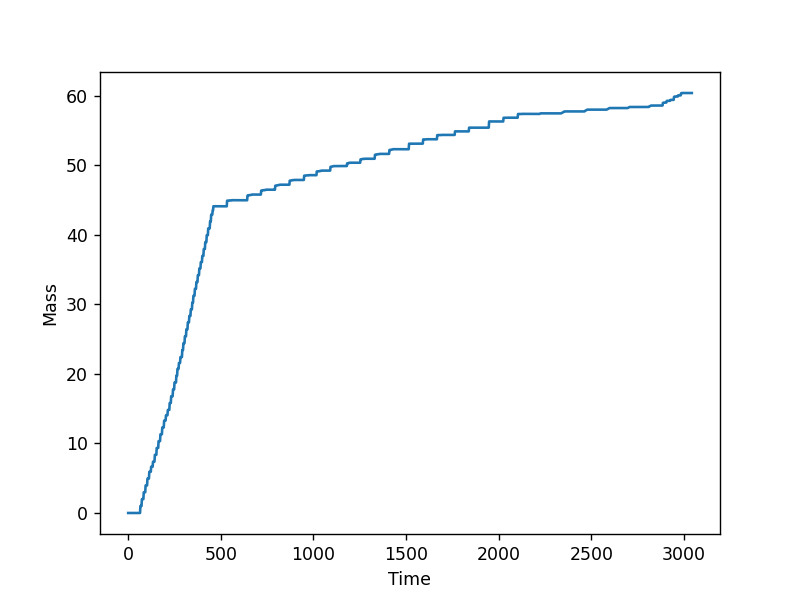

In [7]:
sns.lineplot(x='Time', y='Mass', data=mass_df);

In [8]:
mass_df.to_csv('mass_data/MassProfile_130323_S157-162.csv')